<a href="https://colab.research.google.com/github/swastikbanerjee/NLP_Lab/blob/main/nlpLab8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing Necessary Libraries**

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential,  Model
from sklearn.metrics import confusion_matrix
from sklearn.utils.class_weight import compute_class_weight
from keras.layers import Dense, LSTM, Dropout, SimpleRNN, Embedding, Input
import os
import string
from string import digits
import re
from sklearn.utils import shuffle

# **Implement the Weather Prediction using RNN and LSTM.**

In [ ]:
data = pd.read_csv("/content/seattle-weather.csv")
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,drizzle
1,2012-01-02,10.9,10.6,2.8,4.5,rain
2,2012-01-03,0.8,11.7,7.2,2.3,rain
3,2012-01-04,20.3,12.2,5.6,4.7,rain
4,2012-01-05,1.3,8.9,2.8,6.1,rain


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1461 entries, 0 to 1460
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           1461 non-null   object 
 1   precipitation  1461 non-null   float64
 2   temp_max       1461 non-null   float64
 3   temp_min       1461 non-null   float64
 4   wind           1461 non-null   float64
 5   weather        1461 non-null   object 
dtypes: float64(4), object(2)
memory usage: 68.6+ KB


In [ ]:
data.describe(include='all')

,date,precipitation,temp_max,temp_min,wind,weather
count,1461,1461.000000,1461.000000,1461.000000,1461.000000,1461
unique,1461,NaN,NaN,NaN,NaN,5
top,2012-01-01,NaN,NaN,NaN,NaN,rain
freq,1,NaN,NaN,NaN,NaN,641
mean,NaN,3.029432,16.439083,8.234771,3.241136,NaN
std,NaN,6.680194,7.349758,5.023004,1.437825,NaN
min,NaN,0.000000,-1.600000,-7.100000,0.400000,NaN
25%,NaN,0.000000,10.600000,4.400000,2.200000,NaN
50%,NaN,0.000000,15.600000,8.300000,3.000000,NaN
75%,NaN,2.800000,22.200000,12.200000,4.000000,NaN


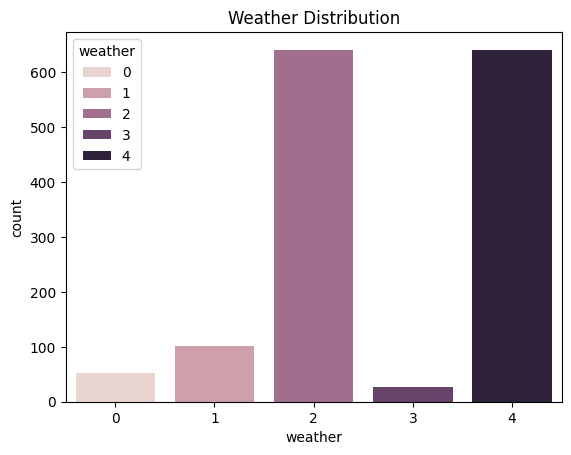

In [ ]:
sns.countplot(x='weather',data=data,hue=data['weather'])
plt.title(("Weather Distribution"))
plt.show()

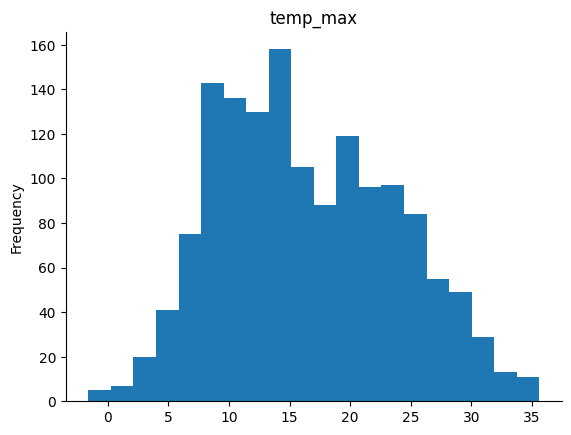

In [ ]:
data['temp_max'].plot(kind='hist', bins=20, title='temp_max')
plt.gca().spines[['top', 'right',]].set_visible(False)

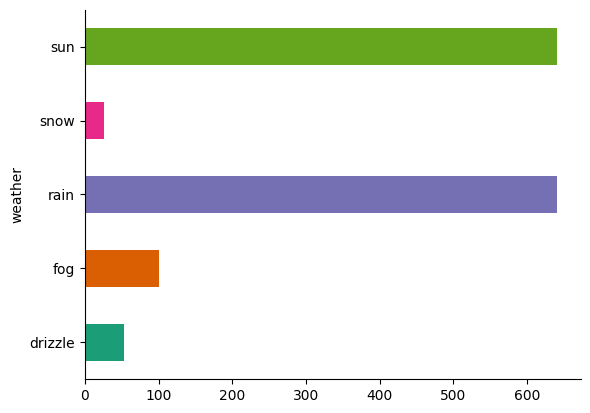

In [ ]:
data.groupby('weather').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

<ipython-input-7-b6c36734f836>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='wind', y='weather', inner='box', palette='Dark2')


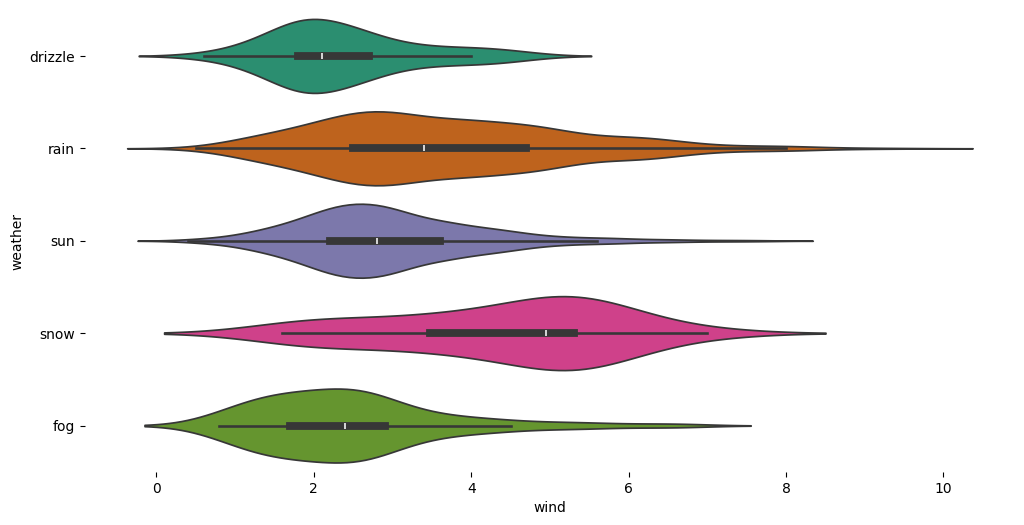

In [ ]:
figsize = (12, 1.2 * len(data['weather'].unique()))
plt.figure(figsize=figsize)
sns.violinplot(data, x='wind', y='weather', inner='box', palette='Dark2')
sns.despine(top=True, right=True, bottom=True, left=True)

In [ ]:
data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [ ]:
lb = LabelEncoder()
data['weather'] = lb.fit_transform(data['weather'])
data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,2012-01-01,0.0,12.8,5.0,4.7,0
1,2012-01-02,10.9,10.6,2.8,4.5,2
2,2012-01-03,0.8,11.7,7.2,2.3,2
3,2012-01-04,20.3,12.2,5.6,4.7,2
4,2012-01-05,1.3,8.9,2.8,6.1,2


In [ ]:
data['date'] = pd.to_datetime(data['date'])

In [ ]:
# Scaling the numerical variables

scaler = MinMaxScaler()
data[['precipitation', 'temp_max', 'temp_min', 'wind']] = scaler.fit_transform(data[['precipitation', 'temp_max', 'temp_min', 'wind']])

In [ ]:
X = data.drop(columns = ['date','weather'])
y = data['weather']

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [ ]:
# Reshaping input data for RNN
X_train = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
X_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
# Ensure the sizes of features and labels match
y_train = y_train[:X_train.shape[0]]

**Recurrent Neural Networks**

---



In [ ]:
model = Sequential()
model.add(SimpleRNN(units=100, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(5, activation='softmax'))

print(model.summary)

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7b98cb455bd0>>


In [ ]:
# Compiling the Model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Fitting the Model
train_history = model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
37/37 [==============================] - 2s 5ms/step - loss: 0.6128 - accuracy: 0.7971
Epoch 2/100
37/37 [==============================] - 0s 4ms/step - loss: 0.6191 - accuracy: 0.7937
Epoch 3/100
37/37 [==============================] - 0s 4ms/step - loss: 0.5842 - accuracy: 0.8065
Epoch 4/100
37/37 [==============================] - 0s 4ms/step - loss: 0.5890 - accuracy: 0.8039
Epoch 5/100
37/37 [==============================] - 0s 6ms/step - loss: 0.6007 - accuracy: 0.8005
Epoch 6/100
37/37 [==============================] - 0s 8ms/step - loss: 0.5821 - accuracy: 0.8039
Epoch 7/100
37/37 [==============================] - 0s 10ms/step - loss: 0.5807 - accuracy: 0.8099
Epoch 8/100
37/37 [==============================] - 0s 9ms/step - loss: 0.5847 - accuracy: 0.8091
Epoch 9/100
37/37 [==============================] - 0s 9ms/step - loss: 0.5975 - accuracy: 0.8014
Epoch 10/100
37/37 [==============================] - 0s 5ms/step - loss: 0.5825 - accuracy: 0.8031
Epoch 11

In [ ]:
loss, accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

10/10 [==============================] - 0s 2ms/step - loss: 0.4662 - accuracy: 0.8430
Test Loss: 0.4661914110183716, Test Accuracy: 0.8430033922195435


In [ ]:
# Prediction

y_pred_probs = model.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

10/10 [==============================] - 0s 2ms/step


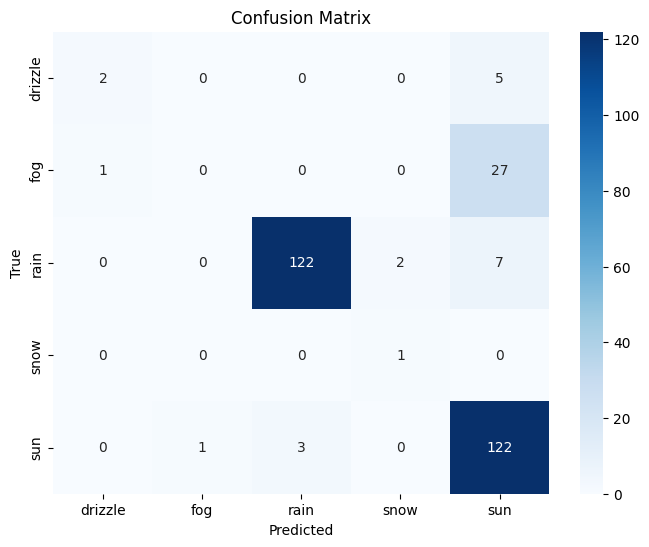

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

**Long Short Term-Memory**

---



In [ ]:
# Compute class weights
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weights_dict = dict(enumerate(class_weights))

In [ ]:
x_train, X_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.1)
# Reshaping input data for RNN
X_train = x_train.values.reshape((x_train.shape[0], x_train.shape[1], 1))
X_val = X_val.values.reshape((X_val.shape[0], X_val.shape[1], 1))
X_test = x_test.values.reshape((x_test.shape[0], x_test.shape[1], 1))

In [ ]:
model1 = Sequential()

model1.add(LSTM(units=50, return_sequences = True, input_shape=(X_train.shape[1], 1)))
model1.add(Dropout(0.2))
model1.add(LSTM(units=50, return_sequences = True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=50, return_sequences = True))
model1.add(Dropout(0.2))
model1.add(LSTM(units=50))
model1.add(Dropout(0.2))
model1.add(Dense(units=5))

print(model1.summary)

<bound method Model.summary of <keras.src.engine.sequential.Sequential object at 0x7b98b720a620>>


In [ ]:
# Compiling the Model
model1.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
# Fitting the Model
train_history = model1.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
24/24 [==============================] - 8s 11ms/step - loss: 3.0331 - accuracy: 0.4222
Epoch 2/100
24/24 [==============================] - 0s 11ms/step - loss: 2.2717 - accuracy: 0.4418
Epoch 3/100
24/24 [==============================] - 0s 11ms/step - loss: 2.2632 - accuracy: 0.4431
Epoch 4/100
24/24 [==============================] - 0s 11ms/step - loss: 2.2445 - accuracy: 0.4340
Epoch 5/100
24/24 [==============================] - 0s 11ms/step - loss: 2.2170 - accuracy: 0.4497
Epoch 6/100
24/24 [==============================] - 0s 11ms/step - loss: 2.1919 - accuracy: 0.4340
Epoch 7/100
24/24 [==============================] - 0s 10ms/step - loss: 2.1406 - accuracy: 0.4431
Epoch 8/100
24/24 [==============================] - 0s 10ms/step - loss: 2.1895 - accuracy: 0.4366
Epoch 9/100
24/24 [==============================] - 0s 11ms/step - loss: 2.1414 - accuracy: 0.4497
Epoch 10/100
24/24 [==============================] - 0s 12ms/step - loss: 2.1532 - accuracy: 0.4444

In [ ]:
loss, accuracy = model1.evaluate(x_test, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

10/10 [==============================] - 2s 7ms/step - loss: 1.0902 - accuracy: 0.4437
Test Loss: 1.0901601314544678, Test Accuracy: 0.44368600845336914


In [ ]:
# Prediction

y_pred_probs = model1.predict(X_test)
y_pred = np.argmax(y_pred_probs, axis=1)

10/10 [==============================] - 2s 4ms/step


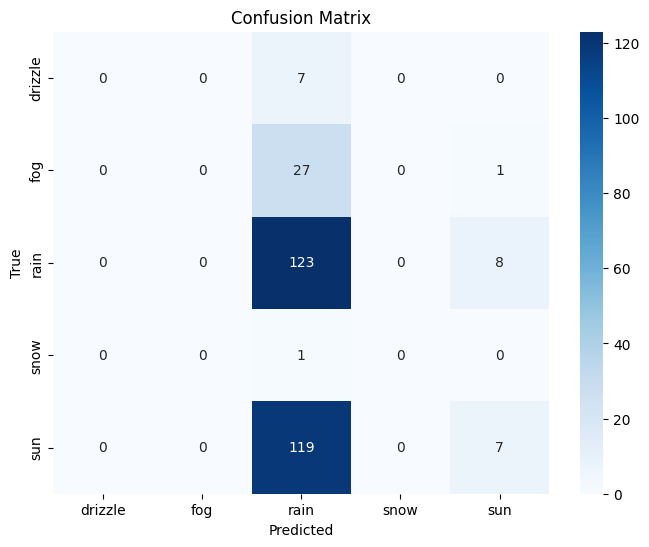

In [ ]:
# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=lb.classes_, yticklabels=lb.classes_)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# **Machine Translation**

In [ ]:
lines=pd.read_csv("/content/Hindi_English_Truncated_Corpus.csv",encoding='utf-8')
lines.head()

,source,english_sentence,hindi_sentence
0,ted,politicians do not have permission to do what ...,"राजनीतिज्ञों के पास जो कार्य करना चाहिए, वह कर..."
1,ted,"I'd like to tell you about one such child,",मई आपको ऐसे ही एक बच्चे के बारे में बताना चाहू...
2,indic2012,This percentage is even greater than the perce...,यह प्रतिशत भारत में हिन्दुओं प्रतिशत से अधिक है।
3,ted,what we really mean is that they're bad at not...,हम ये नहीं कहना चाहते कि वो ध्यान नहीं दे पाते
4,indic2012,.The ending portion of these Vedas is called U...,इन्हीं वेदों का अंतिम भाग उपनिषद कहलाता है।


In [ ]:
lines['source'].value_counts()

source
tides        50000
ted          39881
indic2012    37726
Name: count, dtype: int64

In [ ]:
lines=lines[lines['source']=='ted']

In [ ]:
pd.isnull(lines).sum()

source              0
english_sentence    0
hindi_sentence      0
dtype: int64

In [ ]:
lines=lines[~pd.isnull(lines['english_sentence'])]
lines.drop_duplicates(inplace=True)

In [ ]:
lines=lines.sample(n=25000,random_state=42)
lines.shape

(25000, 3)

In [ ]:
# Lowercase all characters
lines['english_sentence']=lines['english_sentence'].apply(lambda x: x.lower())
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: x.lower())
# Remove quotes
lines['english_sentence']=lines['english_sentence'].apply(lambda x: re.sub("'", '', x))
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: re.sub("'", '', x))
exclude = set(string.punctuation) # Set of all special characters
# Remove all the special characters
lines['english_sentence']=lines['english_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: ''.join(ch for ch in x if ch not in exclude))

In [ ]:
# Remove all numbers from text
remove_digits = str.maketrans('', '', digits)
lines['english_sentence']=lines['english_sentence'].apply(lambda x: x.translate(remove_digits))
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: x.translate(remove_digits))
lines['hindi_sentence'] = lines['hindi_sentence'].apply(lambda x: re.sub("[२३०८१५७९४६]", "", x))

# Remove extra spaces
lines['english_sentence']=lines['english_sentence'].apply(lambda x: x.strip())
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: x.strip())
lines['english_sentence']=lines['english_sentence'].apply(lambda x: re.sub(" +", " ", x))
lines['hindi_sentence']=lines['hindi_sentence'].apply(lambda x: re.sub(" +", " ", x))

In [ ]:
# Add start and end tokens to target sequences
lines['hindi_sentence'] = lines['hindi_sentence'].apply(lambda x : 'START_ '+ x + ' _END')
lines.head()

,source,english_sentence,hindi_sentence
82040,ted,we still dont know who her parents are who she is,START_ हम अभी तक नहीं जानते हैं कि उसके मातापि...
85038,ted,no keyboard,START_ कोई कुंजीपटल नहीं _END
58018,ted,but as far as being a performer,START_ लेकिन एक कलाकार होने के साथ _END
74470,ted,and this particular balloon,START_ और यह खास गुब्बारा _END
122330,ted,and its not as hard as you think integrate cli...,START_ और जितना आपको लगता है यह उतना कठिन नहीं...


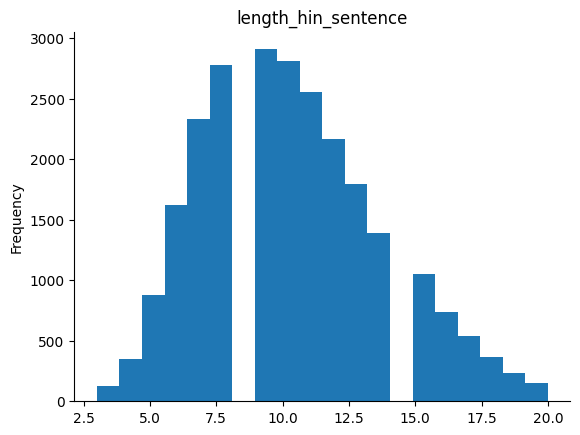

In [ ]:
lines['length_hin_sentence'].plot(kind='hist', bins=20, title='length_hin_sentence')
plt.gca().spines[['top', 'right',]].set_visible(False)

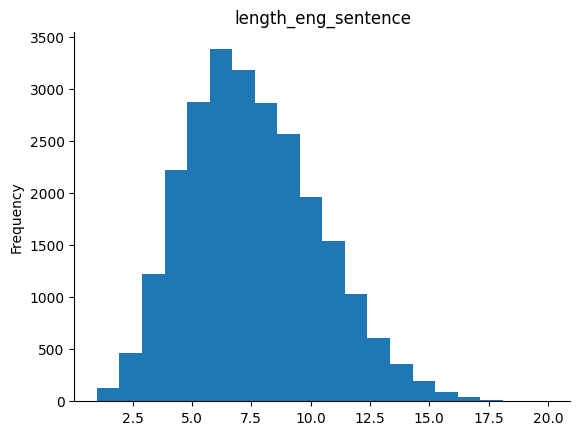

In [ ]:
lines['length_eng_sentence'].plot(kind='hist', bins=20, title='length_eng_sentence')
plt.gca().spines[['top', 'right',]].set_visible(False)

In [ ]:
### Get English and Hindi Vocabulary
all_eng_words=set()
for eng in lines['english_sentence']:
    for word in eng.split():
        if word not in all_eng_words:
            all_eng_words.add(word)

all_hindi_words=set()
for hin in lines['hindi_sentence']:
    for word in hin.split():
        if word not in all_hindi_words:
            all_hindi_words.add(word)
len(all_eng_words)
len(all_hindi_words)

17540

In [ ]:
lines['length_eng_sentence']=lines['english_sentence'].apply(lambda x:len(x.split(" ")))
lines['length_hin_sentence']=lines['hindi_sentence'].apply(lambda x:len(x.split(" ")))
lines.head()

,source,english_sentence,hindi_sentence,length_eng_sentence,length_hin_sentence
82040,ted,we still dont know who her parents are who she is,START_ हम अभी तक नहीं जानते हैं कि उसके मातापि...,11,16
85038,ted,no keyboard,START_ कोई कुंजीपटल नहीं _END,2,5
58018,ted,but as far as being a performer,START_ लेकिन एक कलाकार होने के साथ _END,7,8
74470,ted,and this particular balloon,START_ और यह खास गुब्बारा _END,4,6
122330,ted,and its not as hard as you think integrate cli...,START_ और जितना आपको लगता है यह उतना कठिन नहीं...,16,20


In [ ]:
lines[lines['length_eng_sentence']>30].shape
lines=lines[lines['length_eng_sentence']<=20]
lines=lines[lines['length_hin_sentence']<=20]

In [ ]:
lines.shape

(24774, 5)

In [ ]:
print("maximum length of Hindi Sentence ",max(lines['length_hin_sentence']))
print("maximum length of English Sentence ",max(lines['length_eng_sentence']))

maximum length of Hindi Sentence  20
maximum length of English Sentence  20


In [ ]:
max_length_src=max(lines['length_hin_sentence'])
max_length_tar=max(lines['length_eng_sentence'])

In [ ]:
input_words = sorted(list(all_eng_words))
target_words = sorted(list(all_hindi_words))
num_encoder_tokens = len(all_eng_words)
num_decoder_tokens = len(all_hindi_words)
num_encoder_tokens, num_decoder_tokens

(14030, 17540)

In [ ]:
num_decoder_tokens += 1 #for zero padding
input_token_index = dict([(word, i+1) for i, word in enumerate(input_words)])
target_token_index = dict([(word, i+1) for i, word in enumerate(target_words)])
reverse_input_char_index = dict((i, word) for word, i in input_token_index.items())
reverse_target_char_index = dict((i, word) for word, i in target_token_index.items())
lines = shuffle(lines)
lines.head()

In [ ]:
X, y = lines['english_sentence'], lines['hindi_sentence']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state=42)
X_train.shape, X_test.shape

((19819,), (4955,))

In [ ]:
X_train.to_pickle('X_train.pkl')
X_test.to_pickle('X_test.pkl')

In [ ]:
def generate_batch(X = X_train, y = y_train, batch_size = 128):
    ''' Generate a batch of data '''
    while True:
        for j in range(0, len(X), batch_size):
            encoder_input_data = np.zeros((batch_size, max_length_src),dtype='float32')
            decoder_input_data = np.zeros((batch_size, max_length_tar),dtype='float32')
            decoder_target_data = np.zeros((batch_size, max_length_tar, num_decoder_tokens),dtype='float32')
            for i, (input_text, target_text) in enumerate(zip(X[j:j+batch_size], y[j:j+batch_size])):
                for t, word in enumerate(input_text.split()):
                    encoder_input_data[i, t] = input_token_index[word] # encoder input seq
                for t, word in enumerate(target_text.split()):
                    if t<len(target_text.split())-1:
                        decoder_input_data[i, t] = target_token_index[word] # decoder input seq
                    if t>0:
                        # decoder target sequence (one hot encoded)
                        # does not include the START_ token
                        # Offset by one timestep
                        decoder_target_data[i, t - 1, target_token_index[word]] = 1.
            yield([encoder_input_data, decoder_input_data], decoder_target_data)

In [ ]:
latent_dim=300

# Encoder
encoder_inputs = Input(shape=(None,))
enc_emb =  Embedding(num_encoder_tokens, latent_dim, mask_zero = True)(encoder_inputs)
encoder_lstm = LSTM(latent_dim, return_state=True)
encoder_outputs, state_h, state_c = encoder_lstm(enc_emb)

# We discard `encoder_outputs` and only keep the states.
encoder_states = [state_h, state_c]

In [ ]:
# Set up the decoder, using `encoder_states` as initial state.
decoder_inputs = Input(shape=(None,))
dec_emb_layer = Embedding(num_decoder_tokens, latent_dim, mask_zero = True)
dec_emb = dec_emb_layer(decoder_inputs)
# We set up our decoder to return full output sequences,
# and to return internal states as well. We don't use the
# return states in the training model, but we will use them in inference.
decoder_lstm = LSTM(latent_dim, return_sequences=True, return_state=True)
decoder_outputs, _, _ = decoder_lstm(dec_emb,
                                     initial_state=encoder_states)
decoder_dense = Dense(num_decoder_tokens, activation='softmax')
decoder_outputs = decoder_dense(decoder_outputs)

# Define the model that will turn
# `encoder_input_data` & `decoder_input_data` into `decoder_target_data`
model = Model([encoder_inputs, decoder_inputs], decoder_outputs)

In [ ]:
model.compile(optimizer='rmsprop', loss='categorical_crossentropy')
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 input_2 (InputLayer)        [(None, None)]               0         []                            
                                                                                                  
 embedding (Embedding)       (None, None, 300)            4209000   ['input_1[0][0]']             
                                                                                                  
 embedding_1 (Embedding)     (None, None, 300)            5262300   ['input_2[0][0]']             
                                                                                              

In [ ]:
train_samples = len(X_train)
val_samples = len(X_test)
batch_size = 128
epochs = 100
model.fit(generate_batch(X_train, y_train, batch_size = 128),steps_per_epoch = train_samples//batch_size,epochs=epochs, validation_data = generate_batch(X_test, y_test, batch_size = 128),validation_steps = val_samples//batch_size)

Epoch 1/100
154/154 [==============================] - 75s 426ms/step - loss: 6.9623 - val_loss: 6.4076
Epoch 2/100
154/154 [==============================] - 63s 410ms/step - loss: 6.3161 - val_loss: 6.3398
Epoch 3/100
154/154 [==============================] - 61s 400ms/step - loss: 6.2622 - val_loss: 6.3134
Epoch 4/100
154/154 [==============================] - 61s 395ms/step - loss: 6.2136 - val_loss: 6.2623
Epoch 5/100
154/154 [==============================] - 52s 336ms/step - loss: 6.1386 - val_loss: 6.1915
Epoch 6/100
154/154 [==============================] - 51s 333ms/step - loss: 6.0558 - val_loss: 6.1135
Epoch 7/100
154/154 [==============================] - 60s 393ms/step - loss: 5.9711 - val_loss: 6.0449
Epoch 8/100
154/154 [==============================] - 61s 394ms/step - loss: 5.8946 - val_loss: 5.9780
Epoch 9/100
154/154 [==============================] - 60s 393ms/step - loss: 5.8274 - val_loss: 5.9282
Epoch 10/100
154/154 [==============================] - 60s 390m

In [ ]:
model.save_weights('nmt_weights.h5')
# Encode the input sequence to get the "thought vectors"
encoder_model = Model(encoder_inputs, encoder_states)

# Decoder setup
# Below tensors will hold the states of the previous time step
decoder_state_input_h = Input(shape=(latent_dim,))
decoder_state_input_c = Input(shape=(latent_dim,))
decoder_states_inputs = [decoder_state_input_h, decoder_state_input_c]

dec_emb2= dec_emb_layer(decoder_inputs) # Get the embeddings of the decoder sequence

# To predict the next word in the sequence, set the initial states to the states from the previous time step
decoder_outputs2, state_h2, state_c2 = decoder_lstm(dec_emb2, initial_state=decoder_states_inputs)
decoder_states2 = [state_h2, state_c2]
decoder_outputs2 = decoder_dense(decoder_outputs2) # A dense softmax layer to generate prob dist. over the target vocabulary

# Final decoder model
decoder_model = Model(
    [decoder_inputs] + decoder_states_inputs,
    [decoder_outputs2] + decoder_states2)

In [ ]:
def decode_sequence(input_seq):
    # Encode the input as state vectors.
    states_value = encoder_model.predict(input_seq)
    # Generate empty target sequence of length 1.
    target_seq = np.zeros((1,1))
    # Populate the first character of target sequence with the start character.
    target_seq[0, 0] = target_token_index['START_']

    # Sampling loop for a batch of sequences
    # (to simplify, here we assume a batch of size 1).
    stop_condition = False
    decoded_sentence = ''
    while not stop_condition:
        output_tokens, h, c = decoder_model.predict([target_seq] + states_value)

        # Sample a token
        sampled_token_index = np.argmax(output_tokens[0, -1, :])
        sampled_char = reverse_target_char_index[sampled_token_index]
        decoded_sentence += ' '+sampled_char

        # Exit condition: either hit max length
        # or find stop character.
        if (sampled_char == '_END' or
           len(decoded_sentence) > 50):
            stop_condition = True

        # Update the target sequence (of length 1).
        target_seq = np.zeros((1,1))
        target_seq[0, 0] = sampled_token_index

        # Update states
        states_value = [h, c]

    return decoded_sentence

In [ ]:
train_gen = generate_batch(X_train, y_train, batch_size = 1)
k=-1
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

1/1 [==============================] - 0s 45ms/step
Input English sentence: and that data is transferred to the devices through the computer
Actual Hindi Translation:  यह सुचना कंप्यूटर के द्वारा दुसरे यंत्रो को भेजी जाती है 
Predicted Hindi Translation:  और यह है कि एक गाँव के रूप में से कुछ नहीं किया 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

1/1 [==============================] - 0s 33ms/step
Input English sentence: as this fear that we have as men
Actual Hindi Translation:  जो हम मर्द के तौर पर महसूस करते हैं 
Predicted Hindi Translation:  और जो कि वो लोग जानते हैं कि यह सब कुछ और 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

1/1 [==============================] - 0s 20ms/step
Input English sentence: this is a training ground to sort out the regulars
Actual Hindi Translation:  यह एक प्रशिक्षण जमीन है नियमित को ऑनर्स से अलग करने के लिए 
Predicted Hindi Translation:  यह एक प्रशिक्षण जमीन है जो कि हवा में ही 


In [ ]:
k+=1
(input_seq, actual_output), _ = next(train_gen)
decoded_sentence = decode_sequence(input_seq)
print('Input English sentence:', X_train[k:k+1].values[0])
print('Actual Hindi Translation:', y_train[k:k+1].values[0][6:-4])
print('Predicted Hindi Translation:', decoded_sentence[:-4])

1/1 [==============================] - 0s 19ms/step
Input English sentence: when there was a report on bank computerization
Actual Hindi Translation:  जब वहाँ बैंक कंप्यूटरीकरण पर एक रिपोर्ट थी 
Predicted Hindi Translation:  जब वहाँ एक ही किताब था एक दोस्त थी 
